# **Job Market Study Notebook**

## Objectives

* Answer **Business Requirement 1**: Understand which variables are most correlated with salary levels.
* Perform correlation analysis (Pearson and Spearman) on numerical and encoded categorical features.
* Perform Remote Work Analysis — how remote_ratio relates to salary.
* Visualise distributions of key variables relative to salary.

## Inputs

* `outputs/datasets/collection/ai_job_dataset1.csv`

## Outputs

* List of most correlated variables with salary_usd.
* Plots visualising salary distributions per variable.
* Conclusions feeding into `app_pages/page_job_market_study.py` and `page_project_hypothesis.py`.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder.
* We access the current directory with `os.getcwd()`

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\chahi\\Desktop\\vscode-project\\the-ai-salary-index\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* `os.path.dirname()` gets the parent directory
* `os.chdir()` defines the new current directory

Confirm the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\chahi\\Desktop\\vscode-project\\the-ai-salary-index'

# Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from feature_engine.discretisation import ArbitraryDiscretiser
sns.set_style("whitegrid")
%matplotlib inline

df = pd.read_csv("outputs/datasets/collection/ai_job_dataset1.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (15000, 20)


,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


# Exploratory Data Analysis (EDA)

## Target variable: salary_usd

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['salary_usd'], kde=True, ax=axes[0])
axes[0].set_title('Salary Distribution (USD)')

sns.boxplot(y=df['salary_usd'], ax=axes[1])
axes[1].set_title('Salary Boxplot (USD)')

plt.tight_layout()
plt.show()

print(df['salary_usd'].describe())

## Correlation Study

### Pearson Correlation (numerical features)

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
pearson_corr = df[numerical_cols].corr()['salary_usd'].drop('salary_usd').sort_values(key=abs, ascending=False)
print("Pearson Correlation with salary_usd:")
print(pearson_corr)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
pearson_corr.plot(kind='bar', ax=ax)
ax.set_title('Pearson Correlation with salary_usd')
ax.set_ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### Spearman Correlation (encoded categorical features)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

df_encoded = df.copy()
df_encoded = df_encoded.drop(columns=['job_id', 'required_skills', 'posting_date',
                                       'application_deadline', 'salary_currency'])

# OrdinalEncoder for columns with a real meaningful order
ordinal_cols = ['experience_level', 'company_size', 'education_required']
ordinal_categories = [
    ['EN', 'MI', 'SE', 'EX'],
    ['S', 'M', 'L'],
    ['High School', 'Associate', 'Bachelor', 'Master', 'PhD']
]
enc_ord = OrdinalEncoder(categories=ordinal_categories)
df_encoded[ordinal_cols] = enc_ord.fit_transform(df_encoded[ordinal_cols])

# OneHotEncoder for nominal columns with no natural order
nominal_cols = ['job_title', 'employment_type', 'company_location',
                'employee_residence', 'industry', 'company_name']
enc_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_array = enc_ohe.fit_transform(df_encoded[nominal_cols])
ohe_df = pd.DataFrame(ohe_array, columns=enc_ohe.get_feature_names_out(nominal_cols), index=df_encoded.index)

df_encoded = df_encoded.drop(columns=nominal_cols)
df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

spearman_corr = df_encoded.corr(method='spearman')['salary_usd'].drop('salary_usd').sort_values(key=abs, ascending=False)
print("Spearman Correlation with salary_usd:")
print(spearman_corr.head(10))

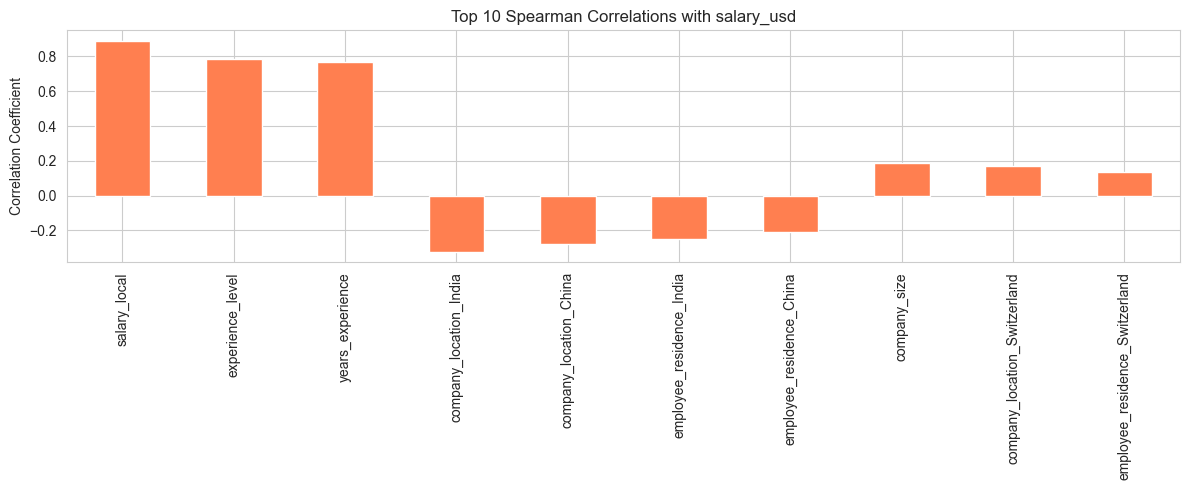

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
spearman_corr.head(10).plot(kind='bar', ax=ax, color='coral')
ax.set_title('Top 10 Spearman Correlations with salary_usd')
ax.set_ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

**Encoding Strategy for Spearman Correlation**

Initially, `OrdinalEncoder` was applied to all categorical columns. However, this produced misleading correlations for `experience_level` and `company_size` because the encoder assigned categories alphabetically, imposing a false order: for example, `EX=0, EN=1, MI=2, SE=3` instead of the correct career progression.

To address this, the encoding strategy was refined based on the nature of each column:

| Column | Encoder | Rationale |
|---|---|---|
| `experience_level` | OrdinalEncoder | Real order: EN → MI → SE → EX |
| `company_size` | OrdinalEncoder | Real order: S → M → L |
| `education_required` | OrdinalEncoder | Real order: High School → Associate → Bachelor → Master → PhD |
| `job_id`, `required_skills`, `posting_date`,`application_deadline`, `salary_currency` | Dropped |Not useful for correlation analysis |

## EDA on Selected Variables

## Parallel Plot